In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

import nengo
import nengo_spa as spa

from nengo_learn_assoc_mem.utils import BasicVecFeed, meg_from_spikes, make_alt_vocab

# Firing Rate Adjustment in 2D

If a neuron responds to the vector stimulus, reduce it's firing rate.

In [2]:
n_neurons = 100

vec_1 = [-1, -1]
vec_2 = [1, 1]

In [3]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, 2)

In [4]:
sim = nengo.Simulator(model)

Building finished in 0:00:01.                                                   


In [5]:
_, activity_1 = nengo.utils.ensemble.tuning_curves(ens, sim, inputs=np.array(vec_1))

In [6]:
activity_1.shape

(100,)

In [7]:
len(activity_1[activity_1 > 0])

42

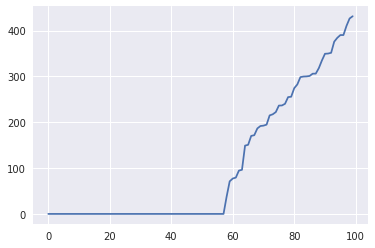

In [8]:
plt.plot(np.sort(activity_1))

In [9]:
built = sim.data[ens]

In [10]:
built.max_rates[activity_1 > 0] = built.max_rates[activity_1 > 0] + 100

with nengo.Network() as adj_model:
    ens = nengo.Ensemble(n_neurons, 2,
                         encoders=built.encoders,
                         eval_points=built.eval_points,
                         intercepts=built.intercepts,
                         max_rates=built.max_rates)

In [11]:
adj_sim = nengo.Simulator(adj_model)

Building finished in 0:00:01.                                                   


In [12]:
_, post_activity_1 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=np.array(vec_1))

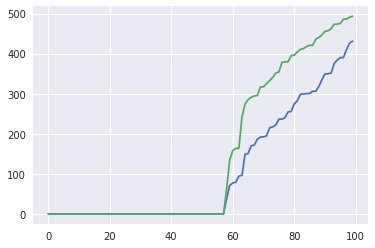

In [13]:
plt.plot(np.sort(activity_1))
plt.plot(np.sort(post_activity_1))

In [14]:
samples = 50
input_1 = -1*np.ones((samples, 2)) + np.random.uniform(size=(samples, 2))*0.1
input_2 = np.ones((samples, 2)) + np.random.uniform(size=(samples, 2))*0.1

In [15]:
_, avg_act_1 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=input_1)
_, avg_act_2 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=input_2)

In [16]:
columns = ("vec", "resp")

a1 = avg_act_1.flatten()
l1 = ["v1"] * len(a1)
p1 = pd.DataFrame({"vec": l1, "resp": list(a1)})


a2 = avg_act_2.flatten()
l2 = ["v2"] * len(a2)
p2 = pd.DataFrame({"vec": l2, "resp": list(a2)})

acts = pd.concat((p1, p2))

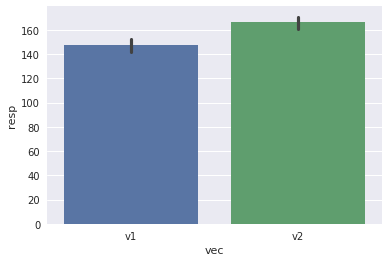

In [17]:
sns.barplot(x="vec", y="resp", data=acts)

# Firing Rate Adjustment for vocab

In [85]:
dimensions = 64
n_neurons = 1000
seed = 8
p_fan = 0.9

In [86]:
vocab, fan1, fan1_vecs, fan2, fan2_vecs, foil1, foil1_vecs, foil2, foil2_vecs = make_alt_vocab(11, 11, dimensions, seed, norm=True)

In [87]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, dimensions)

In [88]:
sim = nengo.Simulator(model)

Building finished in 0:00:01.                                                   


In [89]:
_, activity_1 = nengo.utils.ensemble.tuning_curves(ens, sim, inputs=np.array(fan1_vecs))
_, activity_2 = nengo.utils.ensemble.tuning_curves(ens, sim, inputs=np.array(fan2_vecs))

In [68]:
activity_1.shape

(11, 1000)

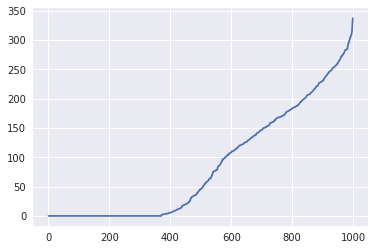

In [90]:
plt.plot(np.sort(np.mean(activity_1, axis=0)))

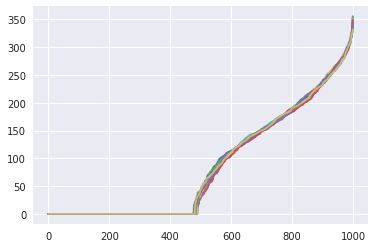

In [91]:
plt.plot(np.sort(activity_1, axis=1).T)

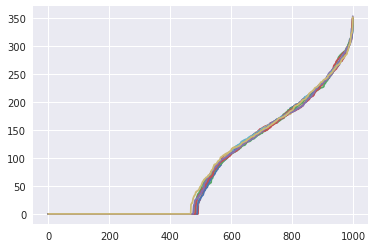

In [121]:
plt.plot(np.sort(activity_2, axis=1).T)

Number of neurons basically firing for both vectors
656


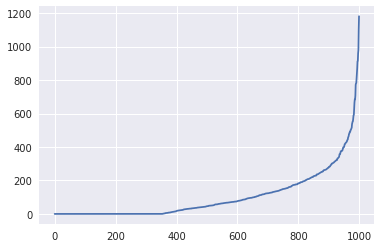

In [94]:
print("Number of neurons basically firing for both vectors")
fire_diff = np.sort(np.abs(np.sum(activity_1, axis=0) - np.sum(activity_2, axis=0)))
same_fire = len(fire_diff[fire_diff < 100])
print(same_fire)
plt.plot(fire_diff)

In [98]:
built = sim.data[ens]
print(built.max_rates.shape)
i_fire_diff = np.argsort(np.abs(np.sum(activity_1, axis=0) - np.sum(activity_2, axis=0)))
print(mean_act_1.shape)

(1000,)
(1000,)


In [99]:
built.max_rates[i_fire_diff[same_fire:]] = built.max_rates[i_fire_diff[same_fire:]] + 100

with nengo.Network() as adj_model:
    ens = nengo.Ensemble(n_neurons, dimensions,
                         encoders=built.encoders,
                         eval_points=built.eval_points,
                         intercepts=built.intercepts,
                         max_rates=built.max_rates)

In [100]:
adj_sim = nengo.Simulator(adj_model)

Building finished in 0:00:01.                                                   


In [118]:
_, post_activity_1 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=np.array(fan1_vecs))
_, post_activity_2 = nengo.utils.ensemble.tuning_curves(ens, adj_sim, inputs=np.array(fan2_vecs))

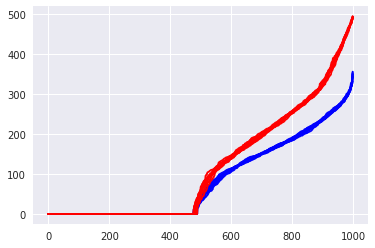

In [119]:
plt.plot(np.sort(activity_1, axis=1).T, color="b")
plt.plot(np.sort(post_activity_1, axis=1).T, color="r")

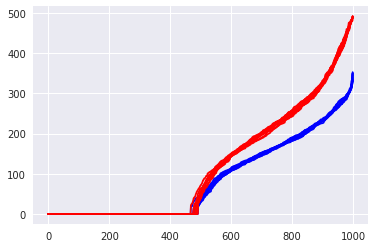

In [123]:
plt.plot(np.sort(activity_2, axis=1).T, color="b")
plt.plot(np.sort(post_activity_2, axis=1).T, color="r")

Number of neurons basically firing for both vectors
687


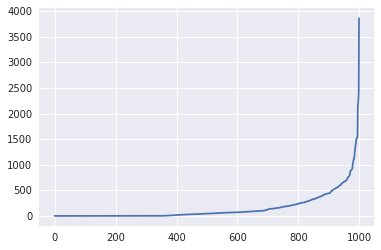

In [122]:
print("Number of neurons basically firing for both vectors")
fire_diff = np.sort(np.abs(np.sum(post_activity_1, axis=0) - np.sum(post_activity_2, axis=0)))
same_fire = len(fire_diff[fire_diff < 100])
print(same_fire)
plt.plot(fire_diff)

In [124]:
columns = ("vec", "resp")

a1 = post_activity_1.flatten()
l1 = ["v1"] * len(a1)
p1 = pd.DataFrame({"vec": l1, "resp": list(a1)})


a2 = post_activity_2.flatten()
l2 = ["v2"] * len(a2)
p2 = pd.DataFrame({"vec": l2, "resp": list(a2)})

acts = pd.concat((p1, p2))

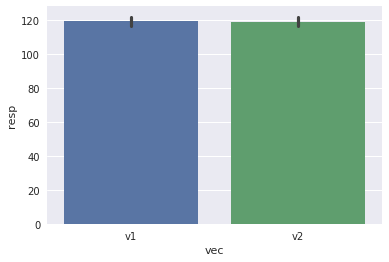

In [125]:
sns.barplot(x="vec", y="resp", data=acts)